CLASSIFICATION OF MUSHROOM EDIBILITY USING MULTI-LAYER PERCEPTRON

Muhammad Bagaswara Sarendra


41521010176


Deep Learning

In [1]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import libraries for preprocessing and machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix

# Import libraries for building Deep Learning models with Keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv('mushroom_cleaned.csv')

In [3]:
data.head(20)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


In [4]:
data.tail(20)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
54015,71,6,3,2,0.991194,445,12,0.943195,1
54016,70,2,3,2,1.241870,395,12,0.888450,1
54017,72,6,3,2,1.206059,490,12,0.888450,1
54018,85,2,3,2,1.122501,498,12,0.888450,1
54019,86,6,3,2,0.859887,541,12,0.943195,1
54020,75,2,3,2,1.512442,397,12,0.888450,1
54021,82,2,3,2,1.353282,462,12,0.888450,1
54022,84,6,3,2,0.828055,575,12,0.943195,1
54023,99,5,3,2,0.967320,534,12,0.943195,1
54024,74,2,3,2,1.042921,517,12,0.943195,1


In [5]:
data.shape

(54035, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [7]:
data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [8]:
columns_new = ['cap-diameter', 'cap-shape', 'stem-color', 'season', 'class']
datajamur = data[columns_new]

In [10]:
datajamur.head(20)

,cap-diameter,cap-shape,stem-color,season,class
0,1372,2,11,1.804273,1
1,1461,2,11,1.804273,1
2,1371,2,11,1.804273,1
3,1261,6,11,1.804273,1
4,1305,6,11,0.943195,1
5,1337,6,11,0.943195,1
6,1300,2,11,1.804273,1
7,1354,6,11,0.888450,1
8,1222,6,11,0.943195,1
9,1085,6,11,0.888450,1


In [11]:
datajamur.tail(20)

,cap-diameter,cap-shape,stem-color,season,class
54015,71,6,12,0.943195,1
54016,70,2,12,0.888450,1
54017,72,6,12,0.888450,1
54018,85,2,12,0.888450,1
54019,86,6,12,0.943195,1
54020,75,2,12,0.888450,1
54021,82,2,12,0.888450,1
54022,84,6,12,0.943195,1
54023,99,5,12,0.943195,1
54024,74,2,12,0.943195,1


In [12]:
datajamur.isnull().sum()

cap-diameter    0
cap-shape       0
stem-color      0
season          0
class           0
dtype: int64

In [13]:
counts = datajamur.groupby(['class']).size().reset_index(name='jumlah')
total_counts = counts['jumlah'].sum()
print(counts)
print("Total Jumlah Data Jamur:", total_counts)

   class  jumlah
0      0   24360
1      1   29675
Total Jumlah Data Jamur: 54035


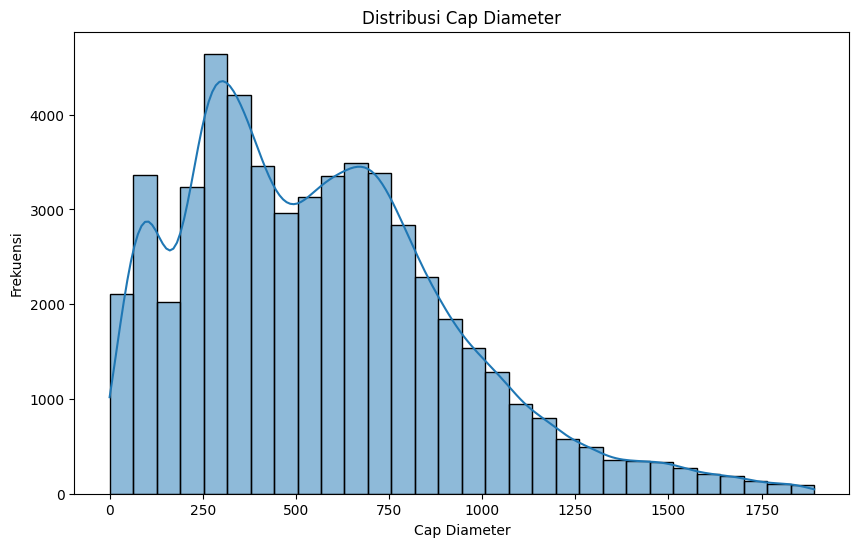

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['cap-diameter'], kde=True, bins=30)
plt.title('Distribusi Cap Diameter')
plt.xlabel('Cap Diameter')
plt.ylabel('Frekuensi')
plt.show()

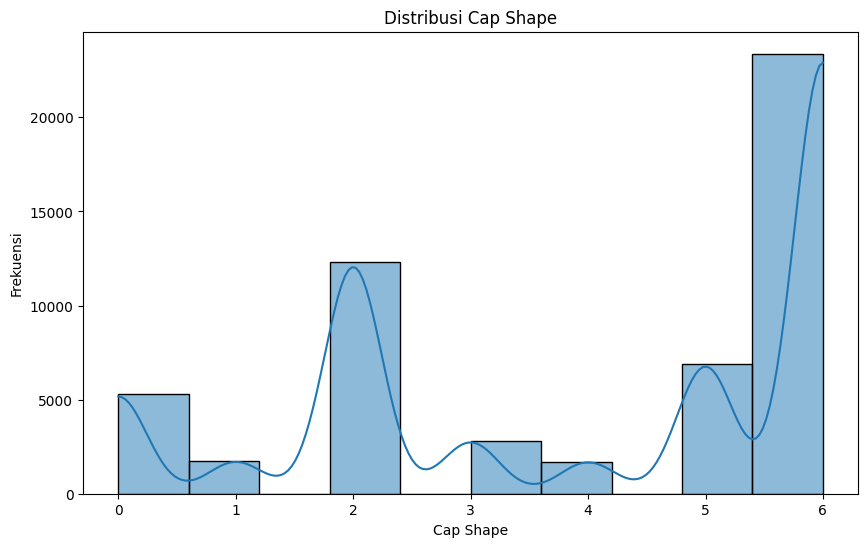

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['cap-shape'], kde=True, bins=10)
plt.title('Distribusi Cap Shape')
plt.xlabel('Cap Shape')
plt.ylabel('Frekuensi')
plt.show()

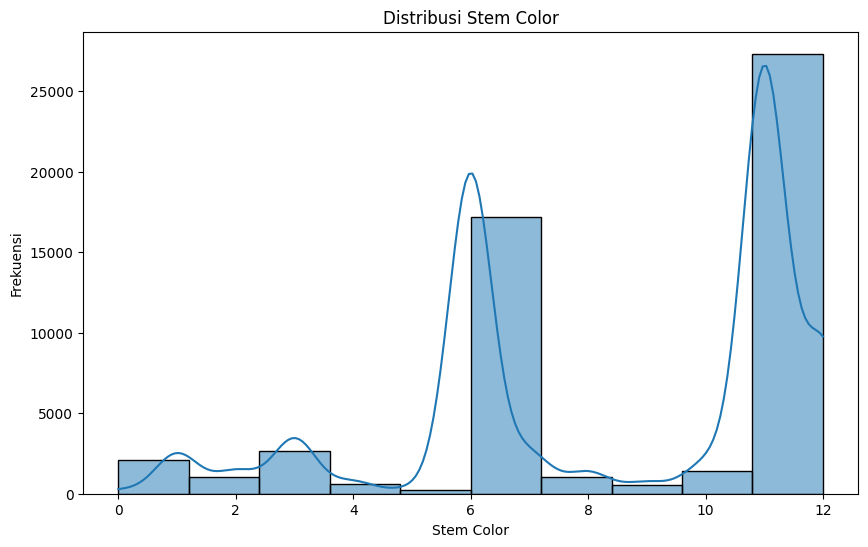

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['stem-color'], kde=True, bins=10)
plt.title('Distribusi Stem Color')
plt.xlabel('Stem Color')
plt.ylabel('Frekuensi')
plt.show()

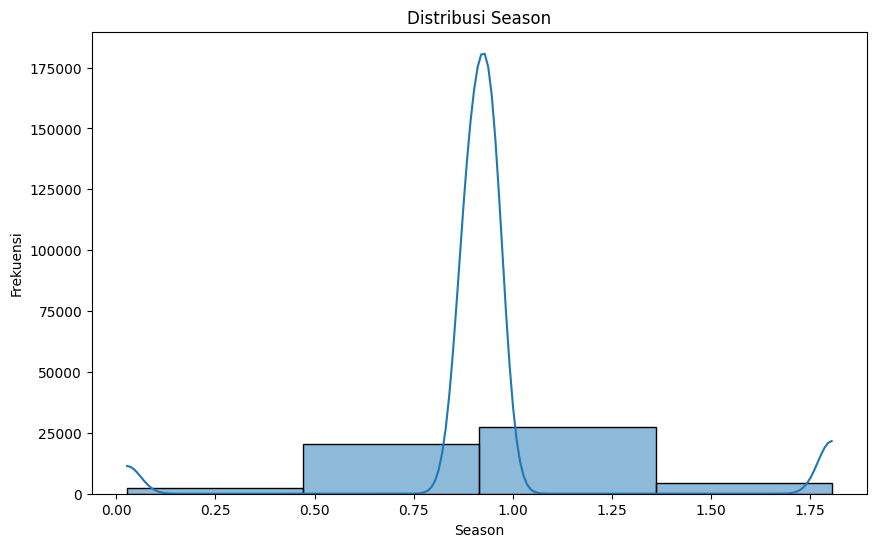

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['season'], kde=True, bins=4) 
plt.title('Distribusi Season')
plt.xlabel('Season')
plt.ylabel('Frekuensi')
plt.show()

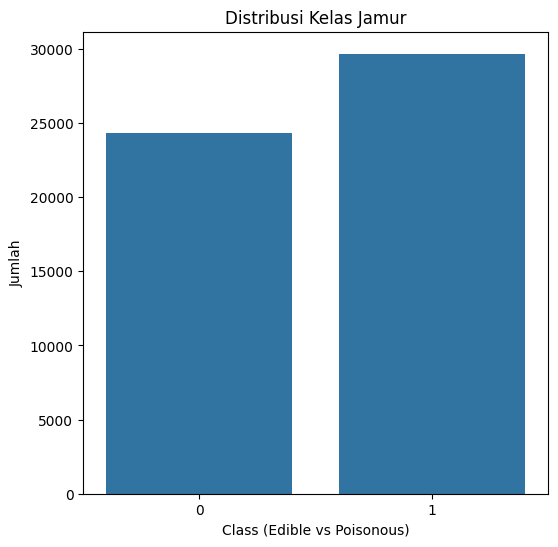

In [17]:
plt.figure(figsize=(6, 6))
sns.countplot(x='class', data=data)
plt.title('Distribusi Kelas Jamur')
plt.xlabel('Class (Edible vs Poisonous)')
plt.ylabel('Jumlah')
plt.show()

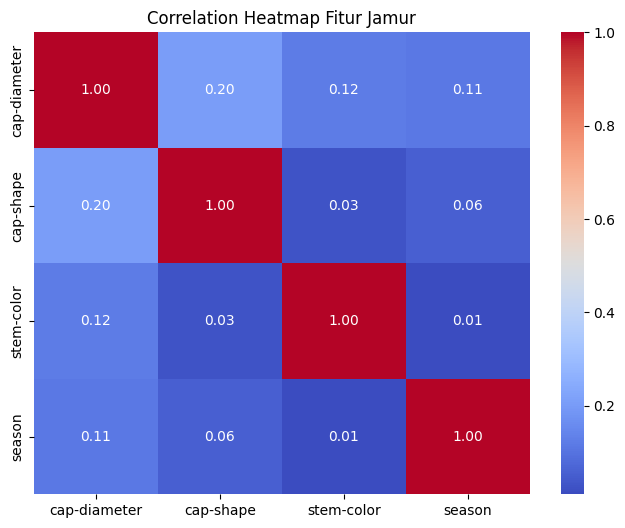

In [17]:
plt.figure(figsize=(8, 6))
correlation_matrix = data[['cap-diameter', 'cap-shape', 'stem-color', 'season']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Fitur Jamur')
plt.show()

In [18]:
categorical_columns = ["cap-shape", "stem-color", "season", "class"]
numerical_columns = [col for col in datajamur.columns if col not in categorical_columns]

In [19]:
databaru = datajamur.copy()
for col in numerical_columns:
    min_val = datajamur[col].min()
    max_val = datajamur[col].max()
    if max_val - min_val != 0:
        databaru[col] = (datajamur[col] - min_val) / (max_val - min_val)
    else:
        databaru[col] = 0

In [20]:
databaru.head(20)

,cap-diameter,cap-shape,stem-color,season,class
0,0.725542,2,11,1.804273,1
1,0.772607,2,11,1.804273,1
2,0.725013,2,11,1.804273,1
3,0.666843,6,11,1.804273,1
4,0.690111,6,11,0.943195,1
5,0.707033,6,11,0.943195,1
6,0.687467,2,11,1.804273,1
7,0.716023,6,11,0.888450,1
8,0.646219,6,11,0.943195,1
9,0.573770,6,11,0.888450,1


In [21]:
databaru.tail(20)

,cap-diameter,cap-shape,stem-color,season,class
54015,0.037546,6,12,0.943195,1
54016,0.037017,2,12,0.888450,1
54017,0.038075,6,12,0.888450,1
54018,0.044950,2,12,0.888450,1
54019,0.045479,6,12,0.943195,1
54020,0.039662,2,12,0.888450,1
54021,0.043363,2,12,0.888450,1
54022,0.044421,6,12,0.943195,1
54023,0.052353,5,12,0.943195,1
54024,0.039133,2,12,0.943195,1


In [22]:
databaru.isnull().sum()

cap-diameter    0
cap-shape       0
stem-color      0
season          0
class           0
dtype: int64

In [23]:
X = datajamur[['cap-diameter', 'cap-shape', 'stem-color', 'season']]
y = datajamur['class']

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, 
                    validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8011 - loss: 0.3861 - val_accuracy: 0.8031 - val_loss: 0.3826
Epoch 2/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8024 - loss: 0.3859 - val_accuracy: 0.7992 - val_loss: 0.3853
Epoch 3/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8022 - loss: 0.3820 - val_accuracy: 0.8034 - val_loss: 0.3840
Epoch 4/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8028 - loss: 0.3828 - val_accuracy: 0.8003 - val_loss: 0.3826
Epoch 5/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8013 - loss: 0.3838 - val_accuracy: 0.8026 - val_loss: 0.3813
Epoch 6/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.8024 - loss: 0.3827 - val_accuracy: 0.8014 - val_loss: 0.3815
Epoch 7/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.8038 - loss: 0.3833 - val_accuracy: 0.8022 - val_loss: 0.3821
Epoch 8/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8072 - loss: 0.3824 - val_accu

In [32]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8055 - loss: 0.3849
Test Loss: 0.3878
Test Accuracy: 79.89%


In [34]:
def display_weights(model):
    print("\nBobot Jaringan:")
    
    for i, layer in enumerate(model.layers):
        weights, biases = layer.get_weights()
        if weights.size > 0: 
            print(f"\nLayer {i+1}:")
            print(f"  Contoh Bobot (w): {weights.flatten()[:5]}")
            print(f"  Bias (b): {biases[:5]}")

# Panggil fungsi untuk menampilkan bobot setelah pelatihan selesai
display_weights(model)


Bobot Jaringan:

Layer 1:
  Contoh Bobot (w): [-0.6102285   0.11644119 -0.65269566  0.16569634  0.08166572]
  Bias (b): [-0.31719112  0.46659812 -0.39164075  0.14359328 -0.27081963]

Layer 2:
  Contoh Bobot (w): [-0.27284333 -0.5070391  -0.5851379   1.0032039   0.36604318]
  Bias (b): [ 0.23295368  0.3495989  -0.07734598  0.0717927  -0.05578776]

Layer 3:
  Contoh Bobot (w): [ 0.255118   -0.8934274  -0.31877193  0.4138206   0.02677982]
  Bias (b): [ 0.34249994 -0.00402166 -0.05796533  0.13012122  0.1094495 ]

Layer 4:
  Contoh Bobot (w): [-1.10172     0.92613214  0.93116844 -0.7065793  -0.6431576 ]
  Bias (b): [-0.07603607]


In [35]:
y_pred = model.predict(X_test)
y_pred_class = (y_pred >= 0.5).astype(int)

338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step


In [36]:
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred_class)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC: {auc:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.84
Recall: 0.78
AUC: 0.90
F1 Score: 0.81


In [37]:
def predict_mushroom():
    print("Masukkan fitur jamur:")
    cap_diameter = float(input("Cap Diameter (contoh: 2.5): "))
    cap_shape = int(input("Cap Shape (contoh: 0-5): "))
    stem_color = int(input("Stem Color (contoh: 0-8): "))
    season = float(input("Season (contoh: 0-3): "))

In [38]:
# Memberikan panduan atau keterangan untuk input pengguna
print("Penjelasan Fitur:")
print("- cap-diameter: Diameter tudung jamur dalam satuan cm. Ini adalah nilai numerik yang menggambarkan ukuran lebar tutup jamur.")
print("- cap-shape: Bentuk dari tutup jamur, yang dapat diwakili oleh beberapa kategori:")
print("  0: Bell (bentuk lonceng)")
print("  1: Conical (kerucut)")
print("  2: Convex (cembung)")
print("  3: Flat (datar)")
print("  4: Sunken (cekung)")
print("  5: Spherical (bulat)")
print("  6: Others")
print("- stem_color: Warna batang jamur, yang dapat diwakili oleh beberapa kategori:")
print("  0: Brown (coklat)")
print("  1: Buff (kuning pucat)")
print("  2: Gray (abu-abu)")
print("  3: Green (hijau)")
print("  4: Pink (merah muda)")
print("  5: Purple (ungu)")
print("  6: Red (merah)")
print("  7: White (putih)")
print("  8: Yellow (kuning)")
print("- season: Musim jamur tumbuh:")
print("  0: Spring (musim semi)")
print("  1: Summer (musim panas)")
print("  2: Autumn (musim gugur)")
print("  3: Winter (musim dingin)")

Penjelasan Fitur:
- cap-diameter: Diameter tudung jamur dalam satuan cm. Ini adalah nilai numerik yang menggambarkan ukuran lebar tutup jamur.
- cap-shape: Bentuk dari tutup jamur, yang dapat diwakili oleh beberapa kategori:
  0: Bell (bentuk lonceng)
  1: Conical (kerucut)
  2: Convex (cembung)
  3: Flat (datar)
  4: Sunken (cekung)
  5: Spherical (bulat)
  6: Others
- stem_color: Warna batang jamur, yang dapat diwakili oleh beberapa kategori:
  0: Brown (coklat)
  1: Buff (kuning pucat)
  2: Gray (abu-abu)
  3: Green (hijau)
  4: Pink (merah muda)
  5: Purple (ungu)
  6: Red (merah)
  7: White (putih)
  8: Yellow (kuning)
- season: Musim jamur tumbuh:
  0: Spring (musim semi)
  1: Summer (musim panas)
  2: Autumn (musim gugur)
  3: Winter (musim dingin)


In [39]:
# Meminta input dari pengguna
cap_diameter = float(input("Masukkan cap diameter (cm): "))
cap_shape = int(input("Masukkan cap shape (0-5): "))
stem_color = int(input("Masukkan stem color (0-8): "))
season = float(input("Masukkan season (0-3): "))

# Buat array input
user_input = np.array([[cap_diameter, cap_shape, stem_color, season]])

# Skala input sesuai data latih
scaler = StandardScaler()
scaler.fit(X_train)  # Gunakan scaler yang sama dari sebelumnya
user_input_scaled = scaler.transform(user_input)

# Prediksi menggunakan model yang sudah dilatih
prediction = model.predict(user_input_scaled)

# Interpretasi hasil prediksi
if prediction >= 0.5:
    print("Hasil Prediksi: Poisonous")
else:
    print("Hasil Prediksi: Edible")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Hasil Prediksi: Edible


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step


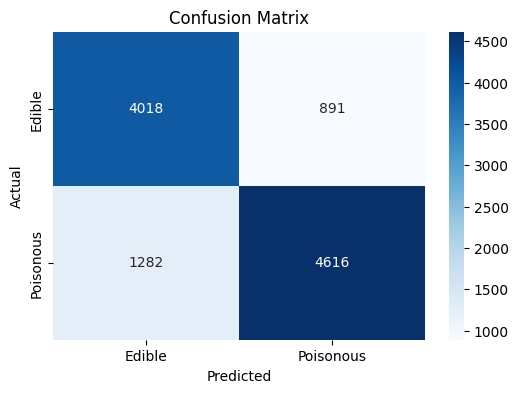

In [40]:
y_pred = model.predict(X_test).round()

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()